<a href="https://colab.research.google.com/github/Anisha-Tasneem/CSE499/blob/main/499RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/CSE499/Dataset.csv')

# Drop irrelevant columns like Customer ID, City Code, Product Code
data = data.drop(columns=['Customer ID', 'City Code', 'Product Code'])

# Convert categorical variables like Gender to numerical values
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Normalize the data
scaler = MinMaxScaler()
data[['Age', 'Total Bill (Taka)', 'Customer Value']] = scaler.fit_transform(data[['Age', 'Total Bill (Taka)', 'Customer Value']])

# Split data into features and target
X = data.drop(columns=['Customer Value'])
y = data['Customer Value']

# Convert dataframe to numpy arrays
X = X.to_numpy()
y = y.to_numpy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for RNN input (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4000, 1, 3)
X_test shape: (1000, 1, 3)
y_train shape: (4000,)
y_test shape: (1000,)


In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_absolute_error

# Define the RNN model
model = Sequential([
    SimpleRNN(units=64, input_shape=(1, 3), activation='relu'),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predict customer values for the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Test Accuracy:", mae)

Epoch 1/50
125/125 [==============================] - 3s 5ms/step - loss: 0.2485 - val_loss: 0.2155
Epoch 2/50
125/125 [==============================] - 0s 3ms/step - loss: 0.2142 - val_loss: 0.2140
Epoch 3/50
125/125 [==============================] - 0s 3ms/step - loss: 0.2139 - val_loss: 0.2141
Epoch 4/50
125/125 [==============================] - 0s 3ms/step - loss: 0.2133 - val_loss: 0.2139
Epoch 5/50
125/125 [==============================] - 0s 3ms/step - loss: 0.2134 - val_loss: 0.2140
Epoch 6/50
125/125 [==============================] - 0s 3ms/step - loss: 0.2134 - val_loss: 0.2138
Epoch 7/50
125/125 [==============================] - 0s 3ms/step - loss: 0.2136 - val_loss: 0.2146
Epoch 8/50
125/125 [==============================] - 0s 3ms/step - loss: 0.2134 - val_loss: 0.2136
Epoch 9/50
125/125 [==============================] - 0s 3ms/step - loss: 0.2129 - val_loss: 0.2147
Epoch 10/50
125/125 [==============================] - 1s 4ms/step - loss: 0.2132 - val_loss: 0.2137

In [43]:
# Define a function to calculate percentage of predictions within a threshold
def percentage_within_threshold(y_true, y_pred, threshold):
    error = np.abs(y_true - y_pred)
    within_threshold = np.sum(error <= threshold)
    total_samples = len(y_true)
    percentage = (within_threshold / total_samples) * 100
    return percentage

# Calculate the percentage of predictions within a threshold (e.g., 10% error)
threshold = 0.1  # Adjust the threshold as needed
percentage_within_threshold = percentage_within_threshold(y_test, y_pred, threshold)
print(f"Percentage of predictions within {threshold * 100}% error:", percentage_within_threshold)


Percentage of predictions within 10.0% error: 0.0


In [45]:
from sklearn.metrics import classification_report

# Binarize predictions and true values
threshold = 0.5  # Adjust as needed
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Print classification report
print(classification_report(y_test_binary, y_pred_binary))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       690
           1       0.00      0.00      0.00       310

    accuracy                           0.69      1000
   macro avg       0.34      0.50      0.41      1000
weighted avg       0.48      0.69      0.56      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
import numpy as np

# Define the number of bins
num_bins = 10

# Create bins based on the range of values
bin_edges = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), num_bins + 1)

# Digitize predictions and true values based on the bin edges
y_pred_bins = np.digitize(y_pred, bin_edges)
y_test_bins = np.digitize(y_test, bin_edges)

# Initialize confusion matrix
confusion_matrix = np.zeros((num_bins, num_bins), dtype=int)

# Populate confusion matrix
for i in range(len(y_pred_bins)):
    pred_bin = y_pred_bins[i]  # Adjusting index to start from 0
    true_bin = y_test_bins[i]  # Adjusting index to start from 0
    confusion_matrix[true_bin][pred_bin] += 1

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)

IndexError: index 11 is out of bounds for axis 0 with size 10

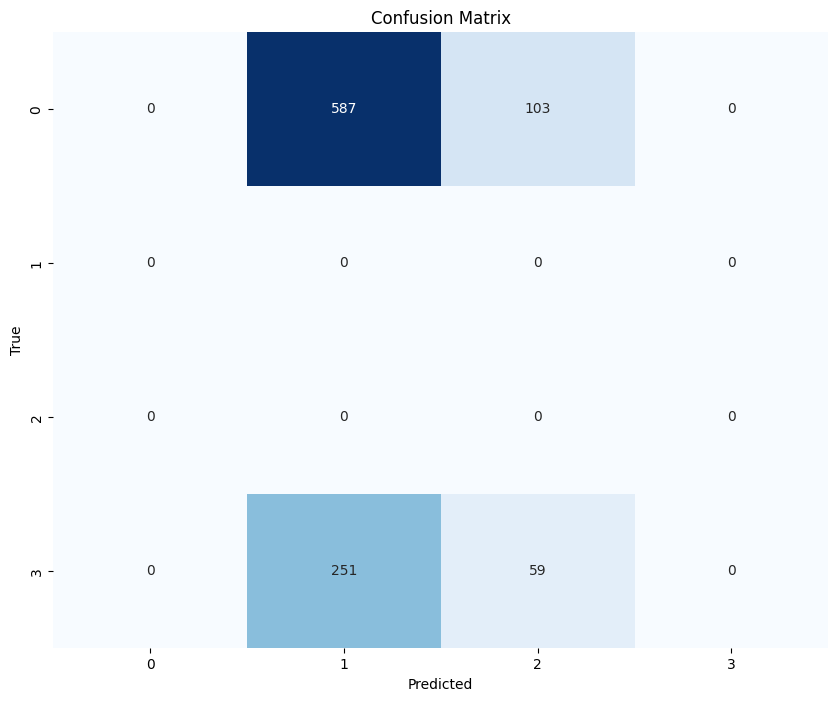

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the number of bins
num_bins = 10

# Create bins based on the range of values
bin_edges = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), num_bins + 1)

# Digitize predictions and true values based on the bin edges
y_pred_bins = np.digitize(y_pred, bin_edges)
y_test_bins = np.digitize(y_test, bin_edges)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_bins, y_pred_bins)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

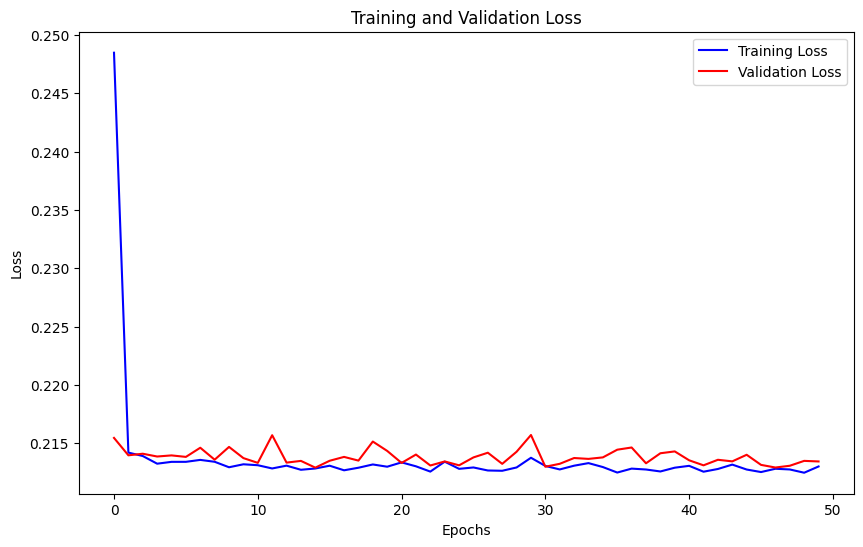

In [53]:
# Check if history is not None
if history is not None:
    # Extract training loss and validation loss from the history object
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create a plot
    plt.figure(figsize=(10, 6))

    # Plot training and validation loss
    plt.plot(train_loss, label='Training Loss', color='blue')
    plt.plot(val_loss, label='Validation Loss', color='red')

    # Add title and labels
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    # Add legend
    plt.legend()

    # Show plot
    plt.show()
else:
    print("Training history is not available.")

In [54]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 64)                4352      
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4417 (17.25 KB)
Trainable params: 4417 (17.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
